In [ ]:
# Install necessary packages (if not already installed)
!pip install scikit-learn pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving test.tsv to test.tsv
Saving train.tsv to train.tsv
Saving valid.tsv to valid.tsv


In [ ]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
valid_df = pd.read_csv('valid.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')


In [ ]:
train_df.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [ ]:
print("Train columns:", train_df.columns.tolist())
print("Validation columns:", valid_df.columns.tolist())


Train columns: ['2635.json', 'false', 'Says the Annies List political group supports third-trimester abortions on demand.', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer']
Validation columns: ['12134.json', 'barely-true', 'We have less Americans working now than in the 70s.', 'economy,jobs', 'vicky-hartzler', 'U.S. Representative', 'Missouri', 'republican', '1', '0', '1.1', '0.1', '0.2', 'an interview with ABC17 News']


In [ ]:
# Define column names based on the dataset structure
column_names = [
    'id', 'label', 'statement', 'subjects', 'speaker', 'job_title', 'state', 'party',
    'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'
]

# Load datasets
train_df = pd.read_csv('train.tsv', sep='\t', header=None, names=column_names)
valid_df = pd.read_csv('valid.tsv', sep='\t', header=None, names=column_names)
test_df = pd.read_csv('test.tsv', sep='\t', header=None, names=column_names)


In [ ]:
# Combine train and validation
combined_df = pd.concat([train_df, valid_df], ignore_index=True)

# Drop rows where either the statement or label is missing
combined_df.dropna(subset=["statement", "label"], inplace=True)

# Clean text
combined_df["statement"] = combined_df["statement"].str.lower().str.strip()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf_vectorizer.fit_transform(combined_df["statement"])
y = combined_df["label"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)


PassiveAggressiveClassifier()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.22125813449023862
Confusion Matrix:
 [[ 67  56  82  66  26  53]
 [ 65 124  92  71  37  68]
 [ 87  88 111 101  29  74]
 [ 60  81 100 116  27  81]
 [ 32  36  22  28  31  19]
 [ 63  73  65  90  23  61]]
Classification Report:
               precision    recall  f1-score   support

 barely-true       0.18      0.19      0.19       350
       false       0.27      0.27      0.27       457
   half-true       0.24      0.23      0.23       490
 mostly-true       0.25      0.25      0.25       465
  pants-fire       0.18      0.18      0.18       168
        true       0.17      0.16      0.17       375

    accuracy                           0.22      2305
   macro avg       0.21      0.21      0.21      2305
weighted avg       0.22      0.22      0.22      2305



In [ ]:
# Clean and vectorize test statements
test_df["statement"] = test_df["statement"].str.lower().str.strip()
X_real_test = tfidf_vectorizer.transform(test_df["statement"])

# Predict
test_predictions = model.predict(X_real_test)

# View predictions
print(test_predictions[:10])


['mostly-true' 'mostly-true' 'pants-fire' 'false' 'false' 'true' 'false'
 'mostly-true' 'mostly-true' 'mostly-true']


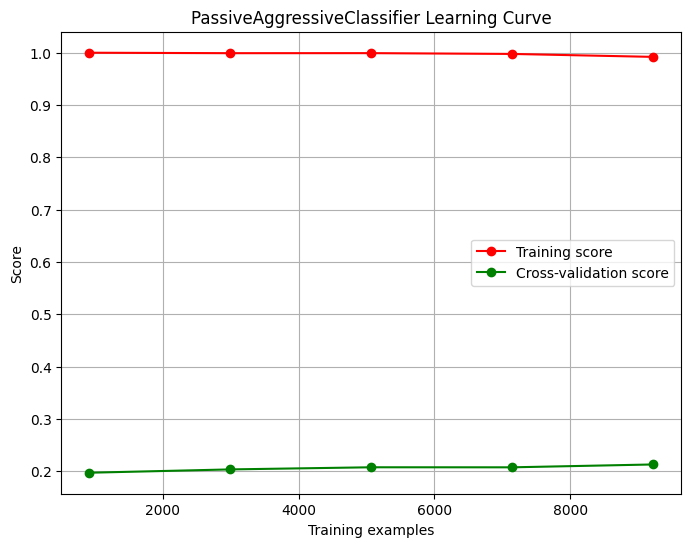

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title("PassiveAggressiveClassifier Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()
